In [1]:
import numpy as np
from mp_api.client import MPRester
import re
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


c:\cleen\Apps\Python3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
meltpercent = pd.read_csv('hilbertspace/oxidemelted_percentages.csv', header=None)


In [3]:
## SKIP THESE UNLESS CHANGING fulldata.csv !!!!!!!!!!!!!!!!!!!!!!!!!!!!!


#### Finalize datasets with headers
realizedalloys_dset = pd.read_csv('realizedalloys_dset_data_metricv727.csv', header=None)
possiblealloys_dset = pd.read_csv('possiblealloys_dset_data_metricv727.csv', header=None)
superconalloys_dset = pd.read_csv('material_dset_data_metricv727.csv', header=None)

# Tc data
realizedalloys_Tc = pd.read_csv('realizedalloys_dset_Tc.csv', header=None)
possiblealloys_Tc = pd.read_csv('possiblealloys_dset_Tc.csv', header=None)
superconalloys_Tc = pd.DataFrame(pd.read_csv('material_dset_data.csv', header=None).iloc[:,43])


# Oxide Metric data
realizedalloys_OxideMetric = pd.read_csv('realizedalloys_dset_oxidemetricv727.csv', header=None)
possiblealloys_OxideMetric = pd.read_csv('possiblealloys_dset_oxidemetricv727.csv', header=None)
superconalloys_OxideMetric = pd.read_csv('material_dset_oxidemetricv727.csv', header=None)

# Oxide Melting Point data
realizedalloys_Melt = pd.read_csv('meltingpoint/mapp_api/realized_alloys_meltpoint.csv').iloc[:,2:]
possiblealloys_Melt = pd.read_csv('meltingpoint/mapp_api/possible_alloys_meltpoint.csv').iloc[:,2:]
superconalloys_Melt = pd.read_csv('meltingpoint/mapp_api/material_dset_meltpoint.csv').iloc[:,2:]

meltpercent = pd.read_csv('hilbertspace/oxidemelted_percentages.csv', header=None)
realizedalloys_OxidePercents = pd.DataFrame(np.array(meltpercent[0:len(realizedalloys_dset)]))
possiblealloys_OxidePercents = pd.DataFrame(np.array(meltpercent[len(realizedalloys_dset):len(realizedalloys_dset)+len(possiblealloys_dset)]))
superconalloys_OxidePercents = pd.DataFrame(np.array(meltpercent[len(realizedalloys_dset)+len(possiblealloys_dset):len(meltpercent)]))

realizedalloys_origin = pd.DataFrame(['matprojexperimental'] * realizedalloys_Tc.size, columns = realizedalloys_Tc.columns)
possiblealloys_origin = pd.DataFrame(['matprojtheoretical'] * possiblealloys_Tc.size, columns = possiblealloys_Tc.columns)
superconalloys_origin = pd.DataFrame(['supercon'] * superconalloys_Tc.size, columns = superconalloys_Tc.columns)


# possiblealloys_names = np.array(possiblealloys_dset.iloc[:, 0])
# possiblealloys_calculation1 = np.array(possiblealloys_dset.iloc[:, 1])
# possiblealloys_calculation2 = np.array(possiblealloys_dset.iloc[:,2])
# possiblealloys_alloydata = np.array(possiblealloys_dset.iloc[:,3:43])
# possiblealloys_elements = np.array(possiblealloys_dset.iloc[:,44:])
# possiblealloys_Tc = np.array(possiblealloys_dset.iloc[:,43])

In [4]:
# Add headers, final format is Origin, Tc, Oxide Metric, Oxide Melting Temp, Element Name, [Data]
realizedalloys = pd.concat([realizedalloys_origin, realizedalloys_Tc, realizedalloys_OxideMetric, realizedalloys_OxidePercents, realizedalloys_Melt, realizedalloys_dset], axis=1)
possiblealloys = pd.concat([possiblealloys_origin, possiblealloys_Tc, possiblealloys_OxideMetric, possiblealloys_OxidePercents, possiblealloys_Melt, possiblealloys_dset], axis=1)
superconalloys = pd.concat([superconalloys_origin, superconalloys_Tc, superconalloys_OxideMetric, superconalloys_OxidePercents, superconalloys_Melt, superconalloys_dset], axis=1)


calculateddatapoints = ['Tc (Pred+Act)','Oxide Metric', 'Oxide Percentage Melted', 'Material Melt Temp','stderr Material Melt Temp']
mainingredient = ['Superconductor'] ###
origin = ['Dset Origin']
calculation1 = ['Formation Energy of supercon']
calculation2 = ['Weighted formation energy of likely oxides']

maincomp = ['atomicradius1','atomicradius2','atomicradius3','atomicradius4','atomicradius5','atomicradius6','atomicradius7','atomicradius8','atomicradius9','atomicradius10',
            'fusionheat1','fusionheat2','fusionheat3','fusionheat4','fusionheat5','fusionheat6','fusionheat7','fusionheat8','fusionheat9','fusionheat10',
            'thermalcond1','thermalcond2','thermalcond3','thermalcond4','thermalcond5','thermalcond6','thermalcond7','thermalcond8','thermalcond9','thermalcond10',
            'numvalence1','numvalence2','numvalence3','numvalence4','numvalence5','numvalence6','numvalence7','numvalence8','numvalence9','numvalence10',
            'Tc'] ###

comp1 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
comp2 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
comp3 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
comp4 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
comp5 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
comp6 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
comp7 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
comp8 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
comp9 = ['number','period','group','Gas','Solid','Liquid','atomic_mass','boil','density','melt','electron_affinity','electronegativity_pauling','firstionE']
ingredient_coefficients = ['comp1','comp2','comp3','comp4','comp5','comp6','comp7','comp8','comp9']
all_comp = np.concatenate((ingredient_coefficients,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9))
headers = np.concatenate((origin, calculateddatapoints,mainingredient,calculation1,calculation2,maincomp, all_comp))

print(len(headers))

realizedalloys.columns = headers
possiblealloys.columns = headers
superconalloys.columns = headers

allalloys = pd.DataFrame(np.array(pd.concat([realizedalloys, possiblealloys, superconalloys], axis = 0)))
allalloys.columns = headers


176


In [5]:
allalloys

,Dset Origin,Tc (Pred+Act),Oxide Metric,Oxide Percentage Melted,Material Melt Temp,stderr Material Melt Temp,Superconductor,Formation Energy of supercon,Weighted formation energy of likely oxides,atomicradius1,...,Gas,Solid,Liquid,atomic_mass,boil,density,melt,electron_affinity,electronegativity_pauling,firstionE
0,matprojexperimental,10.369504,0.046033,0.725263,1314.912964,30.670284,Li1.0Ca1.0Pb1.0,-1.423763,-30.928945,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,matprojexperimental,4.616649,0.013403,0.0,492.074097,16.395039,Fe1.0B4.0,-0.853915,-63.711861,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,matprojexperimental,5.426071,4.674086,1.0,2795.296875,159.73407,Sb9.0S4.0F39.0,-129.863352,-27.783692,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,matprojexperimental,5.593126,0.384199,0.547818,2125.057617,23.040028,Y1.0Cr1.0B4.0,-3.919505,-10.201762,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,matprojexperimental,3.864464,0.212852,0.629442,2088.7146,28.624247,Th1.0Ge1.0S1.0,-4.764835,-22.385671,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175976,supercon,2.44,4.828138,0.089921,1649.549194,47.655148,Tm0.84Lu0.16Fe3Si5,0.0,-65.436148,176.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175977,supercon,122.1,1.028589,0.041456,1126.810181,121.357933,Tl1Ba2Ca3Cu4O11,-42.974492,-41.780039,159.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175978,supercon,1.98,18.267809,0.029306,1282.786987,131.79335,Nb0.8Pd0.2,0.0,-8.333633,183.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175979,supercon,1.84,18.267809,0.032737,1353.406372,76.126221,Nb0.69Pd0.31,0.0,-7.41708,183.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
############# Testing region + SAFE PDV
allalloys
print(len(realizedalloys)+len(possiblealloys)+len(superconalloys))
print(len(allalloys))
allalloys.to_csv('fulldataset_v727.csv', index=False)

NameError: name 'allalloys' is not defined

In [4]:
# SKIP TO HERE  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dataset = pd.read_csv('fulldataset_v727.csv')
dataset_numpy = np.array(dataset)


In [5]:
Names = np.array(dataset.iloc[:,6])
Tc = np.array(dataset.iloc[:,1])
OxideMetric = np.array(dataset.iloc[:,2])
OxideMeltPercent = np.array(dataset.iloc[:,3])
OxideMetric_Predicted = np.array(pd.read_csv('fulldset_predictedmetrics', header=None))


(0.0, 20.0)

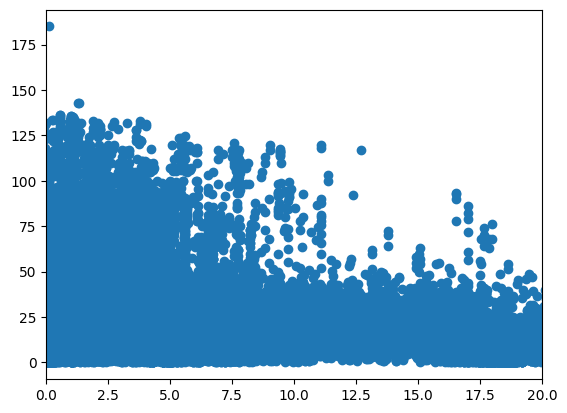

In [7]:
plt.scatter(OxideMetric, Tc)
plt.xlim(0,20)

Text(0.5, 0, 'Oxide Melt Temp (Kelvin)')

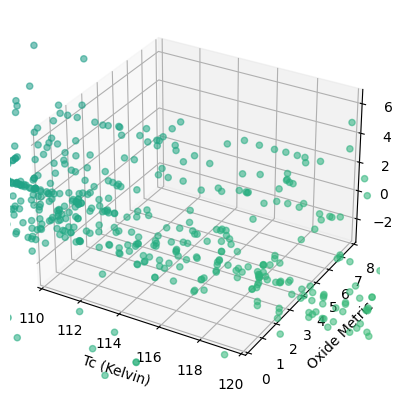

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(Tc, OxideMetric, OxideMeltPercent, c = Tc)
ax.set_xlim(110,120)
ax.set_ylim(0,8)
ax.set_xlabel('Tc (Kelvin)')
ax.set_ylabel('Oxide Metric')
ax.set_zlabel('Oxide Melt Temp (Kelvin)')

In [6]:
# Define scaling factors for Tc, Oxide Metric, Oxide Melt
scaling = [0.5, 5, 1]

def weighteddistance(Point1, Point2):
    vector_apart = Point2 - Point1
    Tc_scaled = vector_apart[0]*scaling[0]
    OxideMetric_scaled = vector_apart[1]*scaling[1]
    OxideMelt = vector_apart[2]*scaling[2]
    distance = (Tc_scaled**2 + OxideMetric_scaled**2 + OxideMelt**2)**0.5
    return distance

def matcheselement(string, letters):
    # Extract only the strings from the input string
    string_letters = ''.join(filter(str.isalpha, string))

    # Remove each letter from the list of letters in a case-sensitive manner
    for letter in letters:
        string_letters = string_letters.replace(letter, '', 1)

    # Check if there are any remaining letters
    return len(string_letters) == 0

def elementsearch(elements):
    searchresults = []
    for entry in dataset_numpy:
        if matcheselement(entry[6], elements):
            searchresults.append(entry)
    return searchresults

def distancesort(exactname, distance):
    cluster = []
    Point1_index = np.where(Names == exactname)[0][0]
    Point1 = np.squeeze(np.array([Tc[Point1_index], OxideMetric[Point1_index], OxideMeltPercent[Point1_index]]))
    
    for entry in dataset_numpy:
        Point2 = np.array([entry[1],entry[2],entry[3]])
        weighteddist = weighteddistance(Point1, Point2)
        if weighteddist < distance:
            cluster.append([weighteddist,entry[6],entry[1],entry[2],entry[3]])
    cluster = np.array(cluster)
    cluster = cluster[cluster[:,1].argsort()]
    return cluster

In [18]:
results = np.array(elementsearch('Ta1.0'))
names = results[:,6]
print(np.sort(names))


['Ta1' 'Ta1' 'Ta1' 'Ta1' 'Ta1' 'Ta1' 'Ta1' 'Ta1' 'Ta1' 'Ta1' 'Ta1.0'
 'Ta1.0' 'Ta1.0' 'Ta1.0' 'Ta1.0' 'Ta1.0' 'Ta1.0' 'Ta1.0' 'Ta1.0' 'Ta1.0']


In [18]:
# #print(np.where(names == 'Cu1.0P6.0Pb9.0O25.0'))
# print(np.where(names == 'Cu1.0P2.0Pb1.0O7.0'))
# print(np.where(names == 'Cu3.0P4.0Pb3.0O16.0'))
# print(np.where(names == 'Cu2.0P2.0Pb1.0O8.0'))

# print(results[40])
# print(results[157])
# print(results[109])

In [20]:
cluster = distancesort('Ta1.0', 2)
print(len(cluster))

438


Text(0.5, 0, 'Oxide Melt Percentage (%)')

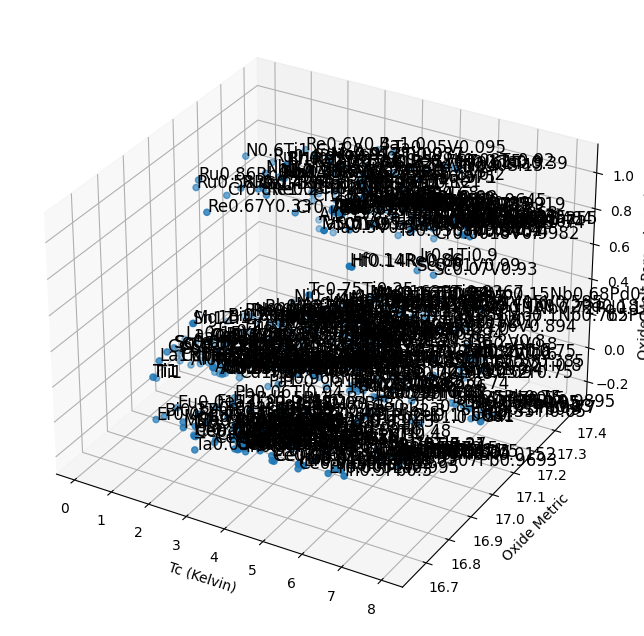

In [21]:
cluster_names = cluster[:,1]
cluster_Tc = np.asarray(cluster[:,2], dtype=float)
cluster_OxideMetric = np.asarray(cluster[:,3], dtype=float)
cluster_OxideMeltTemp = np.asarray(cluster[:,4], dtype=float)

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(cluster_Tc, cluster_OxideMetric, cluster_OxideMeltTemp)
for i, label in enumerate(cluster_names):
    ax.text(cluster_Tc[i], cluster_OxideMetric[i], cluster_OxideMeltTemp[i], label, fontsize = 12)
ax.set_xlabel('Tc (Kelvin)')
ax.set_ylabel('Oxide Metric')
ax.set_zlabel('Oxide Melt Percentage (%)')

In [22]:
import plotly.graph_objects as go

# Create the 3D plot with labels

#For text only on hover
# fig = go.Figure(data=[go.Scatter3d(x=cluster_Tc, y=cluster_OxideMetric, z=cluster_OxideMeltTemp, mode='markers', text=cluster_names, 
#                                    hoverinfo='text', hoverlabel=dict(bgcolor='white', font=dict(size=12)))])
# For text on loading
fig = go.Figure(data=[go.Scatter3d(x=cluster_Tc, y=cluster_OxideMetric, z=cluster_OxideMeltTemp, text=cluster_names, 
                                   mode = 'markers+text',hoverinfo='skip', textposition='middle center')])
fig.update_layout(
    scene=dict(
        xaxis_title='Tc (Kelvin)',
        yaxis_title='Oxide Metric',
        zaxis_title='Oxide MeltTemp (Kelvin)',
        xaxis=dict(range=[min(cluster_Tc), max(cluster_Tc)]),
        yaxis=dict(range=[min(cluster_OxideMetric), max(cluster_OxideMetric)]),
        zaxis=dict(range=[min(cluster_OxideMeltTemp), max(cluster_OxideMeltTemp)]),
    )
)

# Save the plot as an HTML file
fig.write_html('Ta1.0.html')



In [ ]:
### Big picture analysis

Names = np.array(dataset.iloc[:,5])
Tc = np.array(dataset.iloc[:,1])
OxideMetric = np.array(dataset.iloc[:,2])
OxideMeltTemp = np.array(dataset.iloc[:,3])

In [67]:
## Filtered -> Apply filters
Tc_threshold = 110
OxideMetric_threshold = -1
Tc_indices = np.where(Tc > Tc_threshold)
OxideMetric_indices = np.where(OxideMetric > OxideMetric_threshold)
shared_indices = np.intersect1d(Tc_indices, OxideMetric_indices)

filtered_Names = Names[shared_indices]
filtered_Tc = Tc[shared_indices]
filtered_OxideMetric = OxideMetric[shared_indices]
filtered_OxideMeltTemp = OxideMeltTemp[shared_indices]
print(len(shared_indices))


394


Text(0.5, 0, 'Oxide Melt Temp (Kelvin)')

<Figure size 640x480 with 0 Axes>

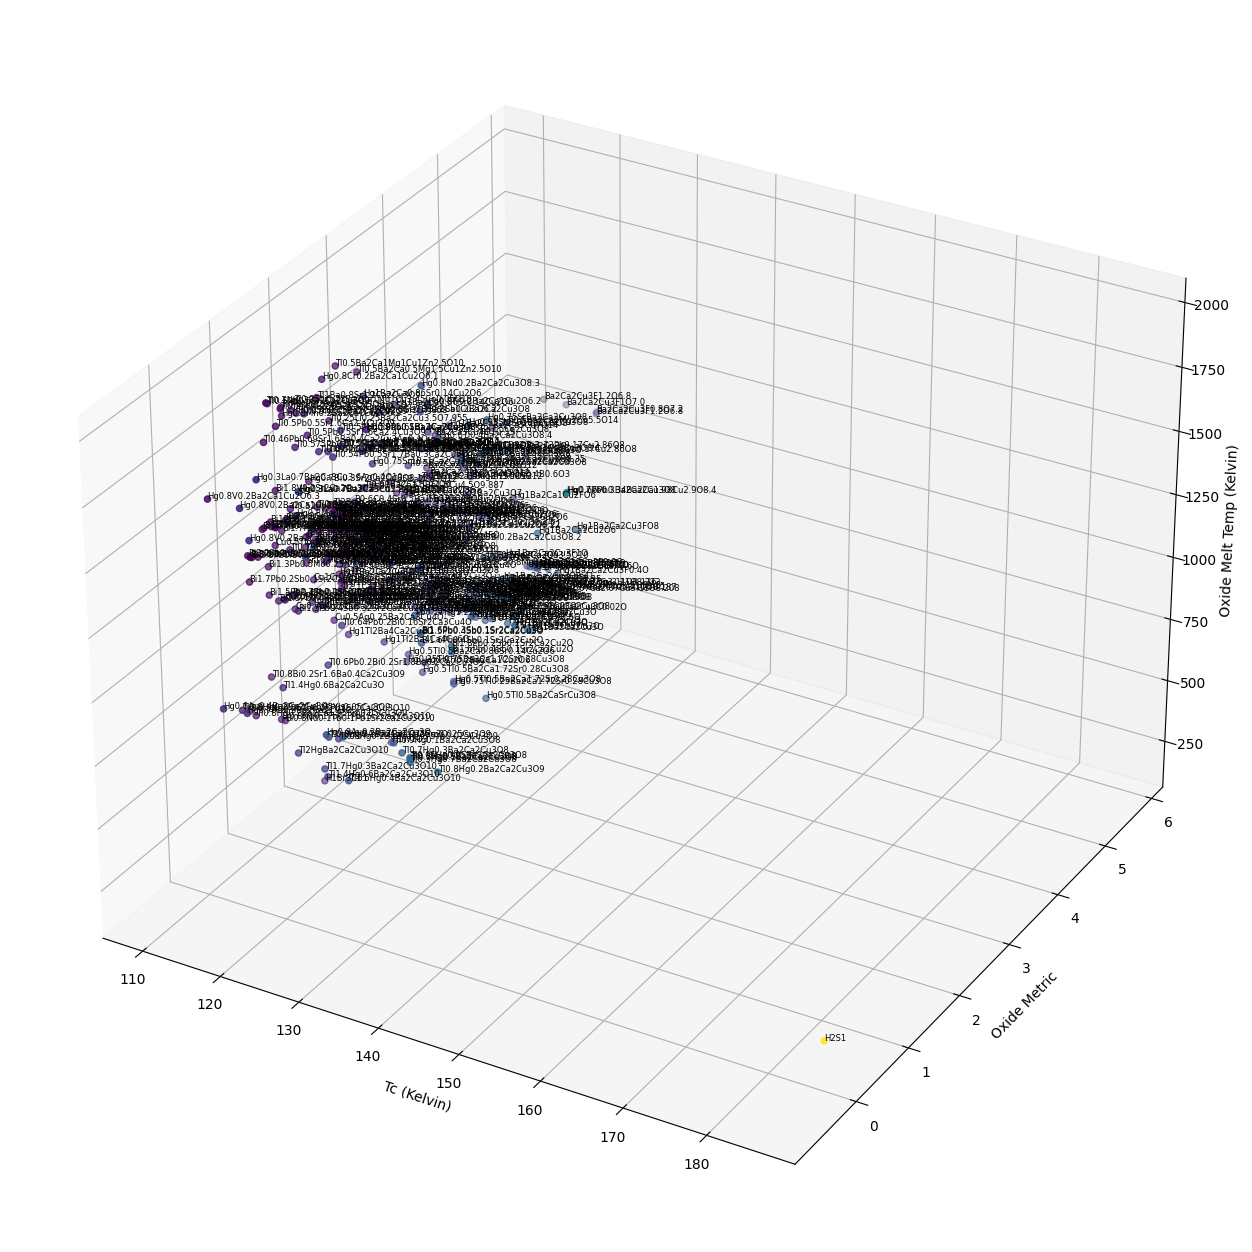

In [68]:
fig = plt.figure()
fig = plt.figure(figsize = (24,16))

ax = plt.axes(projection='3d')
ax.scatter3D(filtered_Tc, filtered_OxideMetric, filtered_OxideMeltTemp, c = filtered_Tc)
for i, label in enumerate(filtered_Names):
    ax.text(filtered_Tc[i], filtered_OxideMetric[i], filtered_OxideMeltTemp[i], label, fontsize = 6)
ax.set_xlabel('Tc (Kelvin)')
ax.set_ylabel('Oxide Metric')
ax.set_zlabel('Oxide Melt Temp (Kelvin)')

In [69]:
import plotly.graph_objects as go

# Create the 3D plot with labels

#For text only on hover
# fig = go.Figure(data=[go.Scatter3d(x=cluster_Tc, y=cluster_OxideMetric, z=cluster_OxideMeltTemp, mode='markers', text=cluster_names, 
#                                    hoverinfo='text', hoverlabel=dict(bgcolor='white', font=dict(size=12)))])
# For text on loading
fig = go.Figure(data=[go.Scatter3d(x=filtered_Tc, y=filtered_OxideMetric, z=filtered_OxideMeltTemp, text=filtered_Names, 
                                   mode = 'markers+text',hoverinfo='skip', textposition='middle center')])
fig.update_layout(
    scene=dict(
        xaxis_title='Tc (Kelvin)',
        yaxis_title='Oxide Metric',
        zaxis_title='Oxide MeltTemp (Kelvin)',
        xaxis=dict(range=[min(filtered_Tc), max(filtered_Tc)]),
        yaxis=dict(range=[min(filtered_OxideMetric), max(filtered_OxideMetric)]),
        zaxis=dict(range=[min(filtered_OxideMeltTemp), max(filtered_OxideMeltTemp)]),
    )
)

# Save the plot as an HTML file
fig.write_html('Tc110MetricNeg1.html')

In [ ]:
################# TWO DIMENSIONAL PLOTS

In [153]:
#### Lower bound filter
## Settings
xlim_left = -4
xlim_right = 4

def testlowerbound(x,y):
    lower_y = 100
    upper_y = 150
    if lower_y < y and upper_y > y:
        return True
def filterxrange(x):
    if x < xlim_right and x > xlim_left:
        return True

filtered_OxideMetric = []
filtered_Tc = []
filtered_names = []
for id in range(len(OxideMetric)):
    x = OxideMetric[id]
    y = Tc[id]
    name = Names[id]
    if testlowerbound(x,y) and filterxrange(x):
        filtered_OxideMetric.append(x)
        filtered_Tc.append(y)
        filtered_names.append(name)
        


Text(0, 0.5, 'Tc')

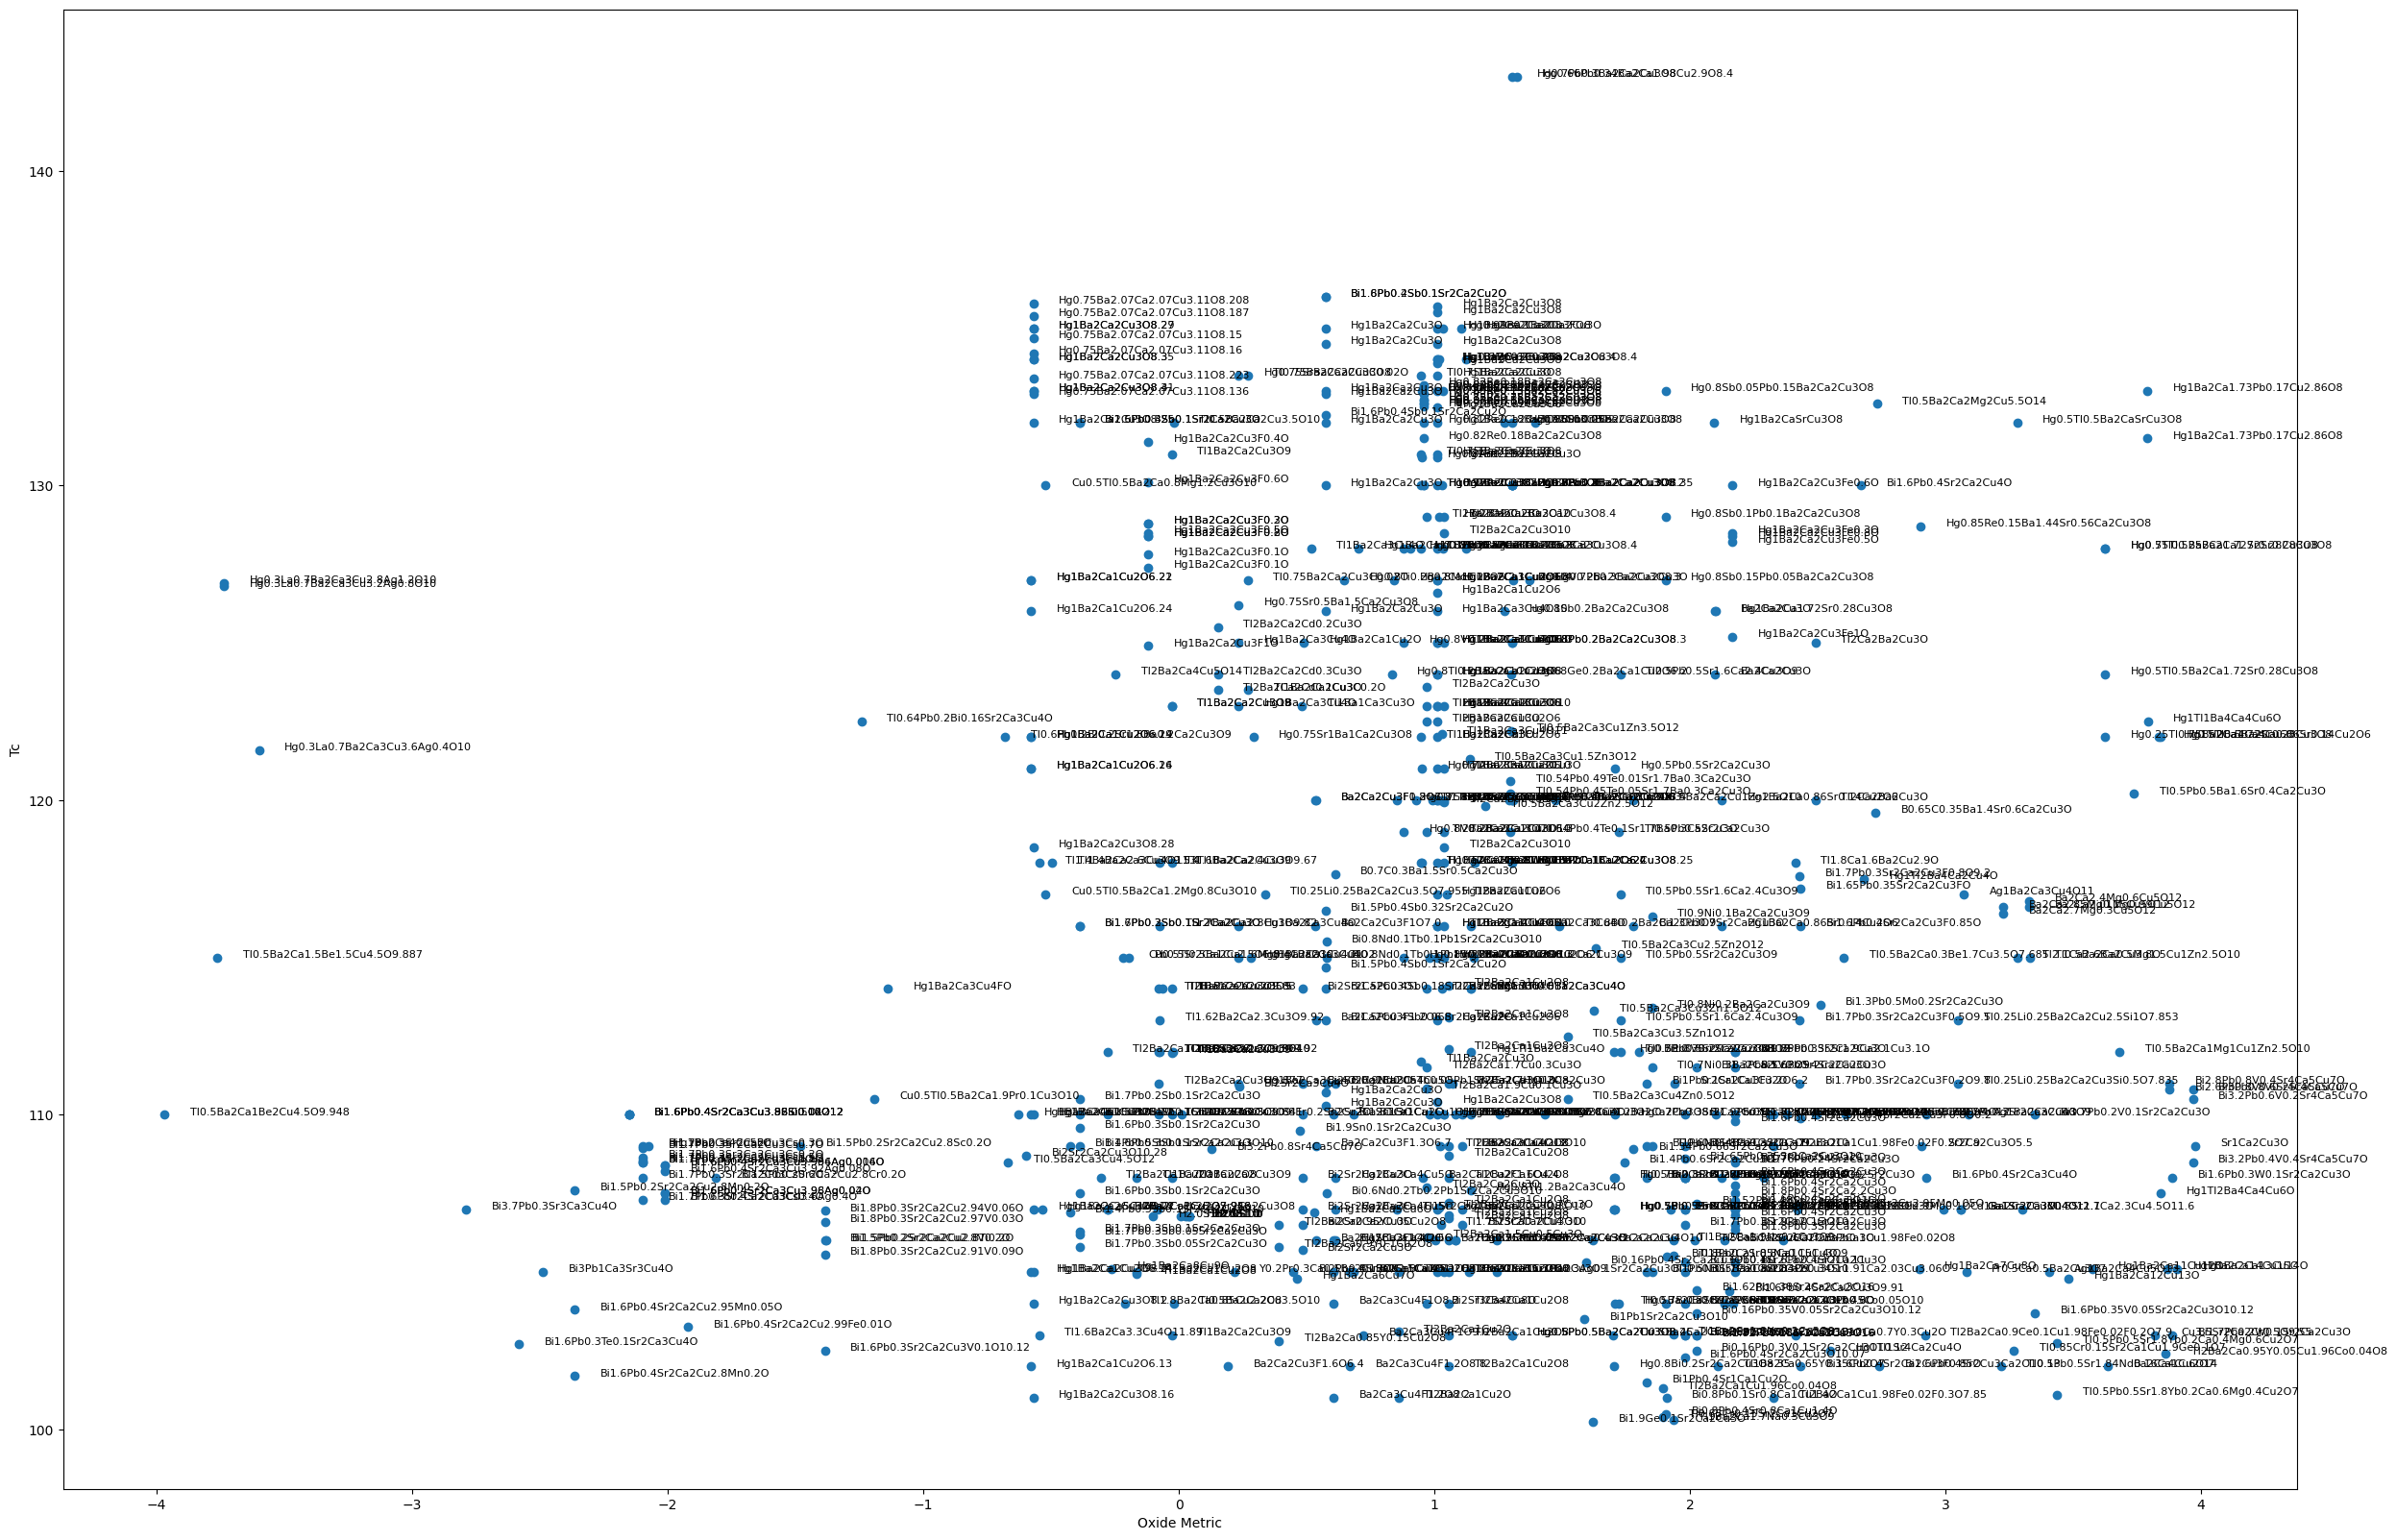

In [156]:
plt.figure(figsize =(30,20))
plt.scatter(filtered_OxideMetric, filtered_Tc)

for i, name in enumerate(filtered_names):
    plt.text(filtered_OxideMetric[i] + 0.1, filtered_Tc[i], name, fontsize = 8)
plt.xlabel('Oxide Metric')
plt.ylabel('Tc')


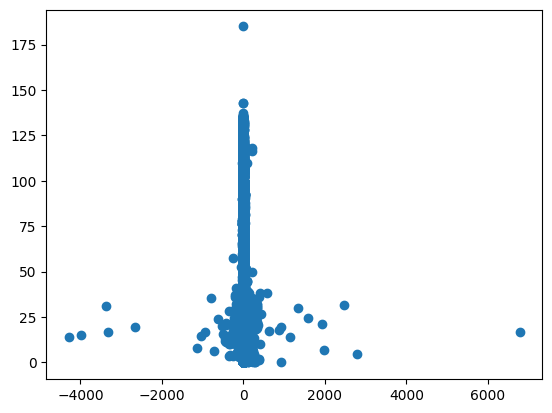

In [155]:
plt.scatter(OxideMetric, Tc)


In [16]:
#### For seeing predicted/actual metrics
## Reminder that naming scheme goes like:
#
OxideMetric_Predicted
OxideMetric
Tc
Names
OxideMeltPercent

array([0.72526341, 0.        , 1.        , ..., 0.02930618, 0.03273738,
       0.41397217])

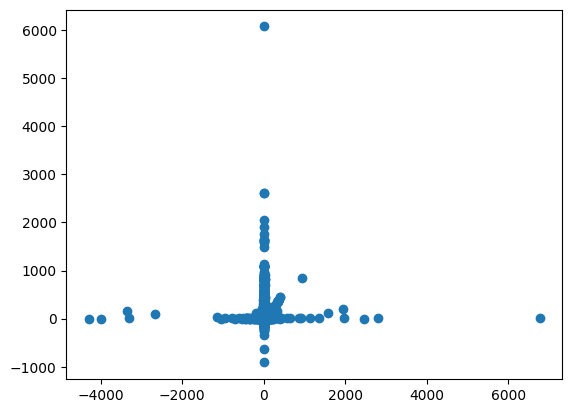

In [17]:
plt.scatter(OxideMetric, OxideMetric_Predicted)

In [27]:
def finddistance_linear(x,y):
    expectedy = x
    return y - x

filtered_x = []
filtered_y = []
filtered_name = []

for i in range(len(Names)):
    x = OxideMetric[i]
    y = OxideMetric_Predicted[i]
    name = Names[i]
    if finddistance_linear(x,y) > 500 and finddistance_linear(x,y) < 2000:
        filtered_x.append(x)
        filtered_y.append(y)
        filtered_name.append(name)
        
filtered_x_predvactOxideMet = np.array(filtered_x)
filtered_y_predvactOxideMet = np.array(filtered_y)
filtered_name_predvactOxideMet = np.array(filtered_name)

Text(0, 0.5, 'Oxide Metric (Predicted)')

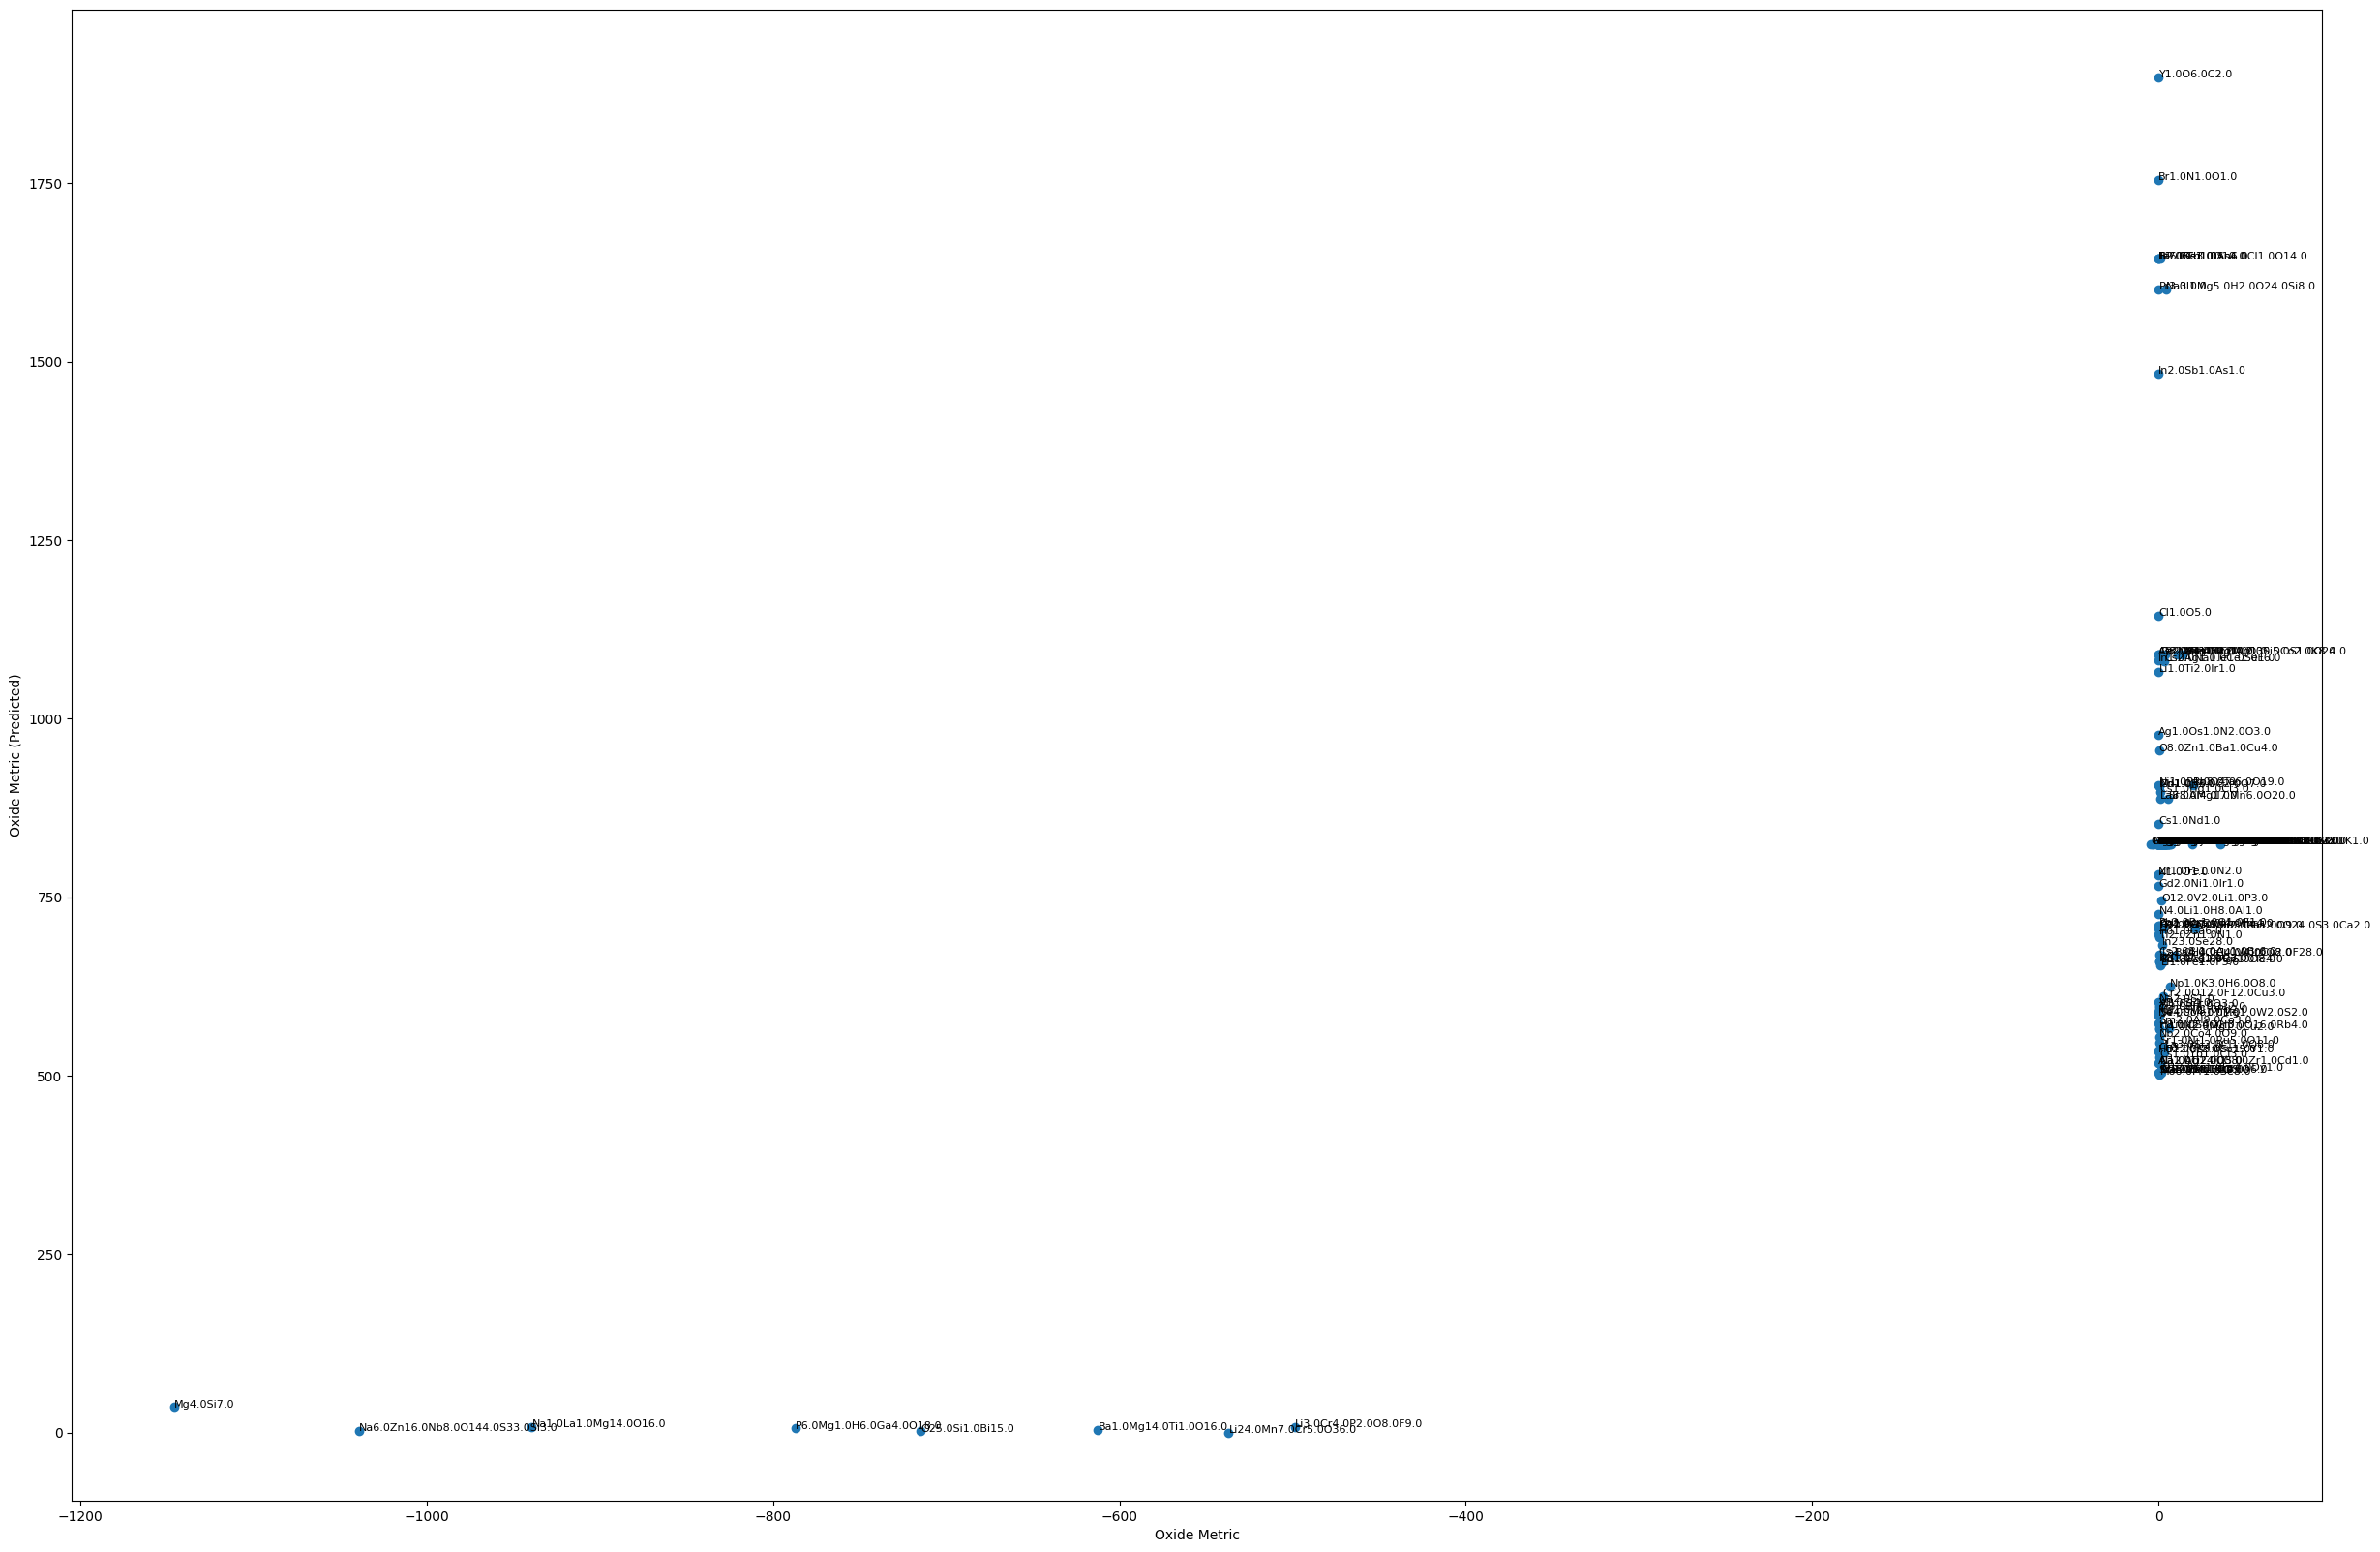

In [28]:
plt.figure(figsize =(30,20))
plt.scatter(filtered_x_predvactOxideMet, filtered_y_predvactOxideMet)

for i, name in enumerate(filtered_name_predvactOxideMet):
    plt.text(filtered_x_predvactOxideMet[i] + 0.1, filtered_y_predvactOxideMet[i], name, fontsize = 8)
plt.xlabel('Oxide Metric')
plt.ylabel('Oxide Metric (Predicted)')